In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(1)


In [18]:
train_data=pd.read_csv("train.csv")
test_data=pd.read_csv("test.csv")
Y_raw = np.array(train_data["label"])
values = np.unique(Y_raw)
total = Y_raw.shape[0]
Y = np.zeros((values.size,total))
for i in range(total) : Y[ Y_raw[i] ][ i ] = 1
Y=Y.astype(int)
m = total

Y_raw = Y_raw.reshape(total,)
X = np.transpose(np.array(train_data.drop(columns=["label"]))) / 255

print("No. of training examples : ", m)
print("Input data Shape (X) : ", X.shape)
print("Output data Shape (Y) : ", Y.shape)
print("Unique Output Values : ", values)

No. of training examples :  42000
Input data Shape (X) :  (784, 42000)
Output data Shape (Y) :  (10, 42000)
Unique Output Values :  [0 1 2 3 4 5 6 7 8 9]



<font size="6" color="green" >3 LAYER NEURAL NETWORK</font>

<br><br>
INPUT LAYER -> UNROLLED 28*28 greyscale image

nx := no. of input features = 784

<br>
1st Layer - > 16 NEURONS , activation ->RELU

nh1 := no. of hidden units in layer 1 = 16

<br>
2nd Layer - > 16 NEURONS , activation ->RELU

nh2 := no. of hidden units in layer 2 = 16

<br>
3rd Layer - > 10 NEURONS , prediction layer , activation ->sigmoid

ny := prediction values for each digit = no. of values = 10

In [19]:
nx=X.shape[0]
nh1=16
nh2=16
ny=10

W1=np.random.randn(nh1,nx)*0.01
b1=np.zeros((nh1,1))
V1=np.zeros(np.shape(W1))
S1=np.zeros(np.shape(W1))

W2=np.random.randn(nh2,nh1)*0.01
b2=np.zeros((nh2,1))
V2=np.zeros(np.shape(W2))
S2=np.zeros(np.shape(W2))

W3=np.random.randn(ny,nh2)*0.01
b3=np.zeros((ny,1))
V3=np.zeros(np.shape(W3))
S3=np.zeros(np.shape(W3))


In [20]:
#forward propagation
def forward_propagate(X,W1,b1,W2,b2,W3,b3):
    
    Z1=np.dot(W1,X) + b1
    A1=np.maximum(0,Z1)
    
    Z2=np.dot(W2,A1) + b2
    A2=np.maximum(0,Z2)
    
    Z3=np.dot(W3,A2) + b3
    A3=1/(1+np.exp(-Z3))
    
    return Z1,A1,Z2,A2,Z3,A3
    

In [21]:
def relu_derivative(Z): return (Z > 0).astype(int)
    
def back_propagate(Y,A3,Z3,A2,Z2,A1,Z1,X,W1,W2,W3,m):
    dA3 = -(np.divide(Y, A3) + np.divide(1 - Y, 1 - A3))
    dZ3 = A3 - Y
    dW3 = np.dot(dZ3,A2.T) / m
    db3 = np.sum(dZ3,axis=1,keepdims=True) / m
    
    dA2 = np.dot(W3.T,dZ3)
    dZ2 = dA2 * relu_derivative(Z2)
    dW2 = np.dot(dZ2,A1.T) / m
    db2 = np.sum(dZ2,axis=1,keepdims=True) / m
    
    dA1 = np.dot(W2.T,dZ2)
    dZ1 = dA1 * relu_derivative(Z1)
    dW1 = np.dot(dZ1,X.T) / m
    db1 = np.sum(dZ1,axis=1,keepdims=True) / m
    
    return dW1,db1,dW2,db2,dW3,db3
    

In [22]:
def update_parameters(learning_rate,W1,b1,W2,b2,W3,b3,dW1,db1,dW2,db2,dW3,db3):
    
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    W3 = W3 - learning_rate*dW3
    b3 = b3 - learning_rate*db3
    
    return W1,b1,W2,b2,W3,b3

In [23]:
def cost(A3,Y):
    return -np.average(Y*np.log(A3) + (1-Y)*np.log(1-A3))

In [24]:
def predictions(A):
    K=np.max(A,axis=0,keepdims=True)
    Val=(K==A)
    pred=[]
    for i in range(A.shape[1]):
        for j in range(A.shape[0]):
            if(Val[j][i]==True) : pred.append(j)
    pred=np.array(pred)
    pred = pred.reshape(A.shape[1],)
    return pred

In [25]:
def accuracy_score(raw, pre):
    return np.sum(raw==pred)/raw.size

In [26]:
num_itr = 500
epochs = (m//200)
learning_rate = 0.8
costs = []
accuracy = []
for i in range(num_itr):
    for epoch in range(epochs):
        X_mini=X[:,epoch*200: (epoch+1)*200]
        Y_mini=Y[:,epoch*200 : (epoch+1)*200]
        Z1,A1,Z2,A2,Z3,A3 = forward_propagate(X_mini,W1,b1,W2,b2,W3,b3)
        dW1,db1,dW2,db2,dW3,db3 = back_propagate(Y_mini,A3,Z3,A2,Z2,A1,Z1,X_mini,W1,W2,W3,m)
        W1,b1,W2,b2,W3,b3 = update_parameters(learning_rate,W1,b1,W2,b2,W3,b3,dW1,db1,dW2,db2,dW3,db3)
    if(i%25==0):
            _,_,_,_,_,Apred=forward_propagate(X,W1,b1,W2,b2,W3,b3)
            pred=predictions(Apred)
            costs.append(cost(Apred,Y))
            Accuracy = accuracy_score(Y_raw, pred)
            accuracy.append(Accuracy)
    if((i+1)%100==0 or i==0):
            print("AT ITERATION ",i+1," : ")
            print("\tCOST : ",costs[-1])
            print("\tACCURACY : ",round(accuracy[-1]*100,2),"%\n")


AT ITERATION  1  : 
	COST :  0.5873168882949988
	ACCURACY :  11.15 %

AT ITERATION  100  : 
	COST :  0.25700843469206863
	ACCURACY :  37.36 %

AT ITERATION  200  : 
	COST :  0.07357188678508902
	ACCURACY :  88.57 %

AT ITERATION  300  : 
	COST :  0.04835490897145565
	ACCURACY :  92.83 %

AT ITERATION  400  : 
	COST :  0.03837734177939197
	ACCURACY :  94.54 %

AT ITERATION  500  : 
	COST :  0.03267846577809122
	ACCURACY :  95.4 %



TRAINING SET Accuracy using 3 Layer Neural Network :  95.57 %


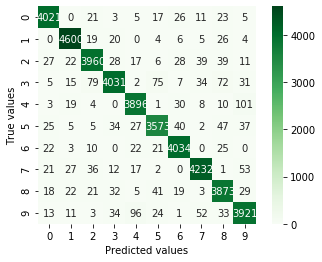

In [27]:
_,_,_,_,_,Ak=forward_propagate(X,W1,b1,W2,b2,W3,b3)
pred=predictions(Ak)

from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_raw, pred)
sns.heatmap(cm,square=True,annot=True,cmap='Greens', fmt='g')
plt.xlabel("Predicted values")
plt.ylabel("True values")
Accuracy = accuracy_score(Y_raw, pred)
print("TRAINING SET Accuracy using 3 Layer Neural Network : ",round(Accuracy*100,2),"%")

Text(0.5, 1.0, 'Cost vs Iterations')

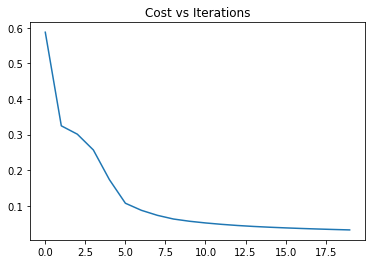

In [33]:
plt.plot(costs)
plt.title("Cost vs Iterations")


In [29]:
X_submit = np.transpose(np.array(test_data)) / 255
Z1_submit,A1_submit,Z2_submit,A2_submit,Z3_submit,A_submit = forward_propagate(X_submit,W1,b1,W2,b2,W3,b3)
pred_submit=predictions(A_submit)
pred_submit=np.transpose(pred_submit)

In [30]:
f = open("submission.txt", "w")
f.write("ImageId,Label")
for i in range(pred_submit.size):
    f.write('\n' + str(i+1) + ',' + str(pred_submit[i]))
f.close()